In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from collections import Counter

      Famille                   Désignation Article Code Article  \
0     Crémeux                               Vanille       CR2001   
1     Crémeux                              Chocolat       CR2002   
2     Crémeux                               Caramel       CR2003   
3     Crémeux                               Praliné       CR2004   
4     Crémeux                              Tiramisu       CR2005   
..        ...                                   ...          ...   
535  Tri-goût  Grenadine - Fraise des bois - Menthe       TR0511   
536  Tri-goût             Grenadine - Anis - Menthe       TR0512   
537  Tri-goût          Grenadine - Carotte - Menthe       TR0513   
538  Tri-goût     Grenadine - Menthe Forte - Menthe       TR0514   
539  Tri-goût           Grenadine - Raisin - Menthe       TR0515   

    PrixUnitaire()  
0                 4  
1                 4  
2                 4  
3                 4  
4                 4  
..              ...  
535               5  
536    

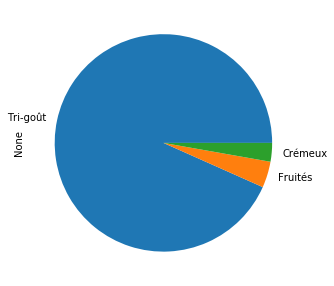

In [181]:
produit = pd.read_csv('./FichierProduits.csv', sep=';', encoding='ISO-8859-1')

result = pd.value_counts(produit['Famille'].values); 
print(result)
result.plot.pie(figsize=(5, 5))

In [191]:
ticket_csv = pd.read_csv('./FichierPanier.csv', sep=';', encoding='ISO-8859-1')

#result = ticket.groupby('DateAchat')['Qté']
#print(result.describe())
ticket = ticket_csv.groupby(['N° ticket', 'DateAchat'])

def get_price(code):
    return float(produit[produit['Code Article'] == code]['PrixUnitaire()'].item().replace(',','.'))
def get_cat(code):
    return produit[produit['Code Article'] == code]['Famille'].item()
def get_gout(code):
    return produit[produit['Code Article'] == code]['Désignation Article'].item()
def get_tickets(ticket):
    tickets = dict()
    for name,group in ticket['CodeArticle']:
        ticket_ = {'total':0,'categories':[],'gout':[]}
        for article in group.values:
            ticket_['total'] += get_price(article)
            ticket_['categories'].append(get_cat(article))
            ticket_['gout'].append(get_gout(article))
        tickets[name] = ticket_
    return tickets

for name,groups in get_tickets(ticket).items():
    print(name)
    print("  Prix total: {}".format(groups['total']))
    print("  Familles: {}".format(Counter(groups['categories'])))
    print("  Goûts: {}".format(Counter(groups['gout'])))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `item` has been deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `item` has been deprecated and will be removed in a future version
  if sys.path[0] == '':


(10248, '01-sept-19')
  Prix total: 44.75
  Familles: Counter({'Tri-goût': 8, 'Crémeux': 1})
  Goûts: Counter({'Lait - Pruneaux - Pamplemousse': 1, 'Lait - Menthe Forte - Pamplemousse': 1, 'Amande': 1, 'Lait - Menthe - Pamplemousse': 1, 'Lait - Fraise des bois - Pamplemousse': 1, 'Lait - Anis - Pamplemousse': 1, 'Lait - Carotte - Pamplemousse': 1, 'Lait - Mandarine - Orange sanguine': 1, 'Lait - Raisin - Pamplemousse': 1})
(10248, '02-sept-19')
  Prix total: 60.0
  Familles: Counter({'Tri-goût': 12})
  Goûts: Counter({'Lait - Orange sanguine - Pamplemousse': 1, 'Lait - Orange - Cerise': 1, 'Lait - Banane - Pamplemousse': 1, 'Lait - Coco - Pamplemousse': 1, 'Lait - Mandarine - Pamplemousse': 1, 'Lait - Fraise des bois - Orange': 1, 'Lait - Menthe - Orange': 1, 'Lait - Coco - Orange': 1, 'Lait - Poire - Pamplemousse': 1, 'Lait - Pruneaux - Orange': 1, 'Lait - Banane - Orange': 1, 'Lait - Orange - Pamplemousse': 1})
(10248, '03-sept-19')
  Prix total: 25.0
  Familles: Counter({'Tri-goût':

  Goûts: Counter({'Lait - Orange sanguine - Fraise': 1, 'Fraise façon crumble': 1, 'Lait - Pamplemousse - Cerise': 1, 'Lait - Pruneaux - Cerise': 1, 'Lait - Banane - Cerise': 1, 'Lait - Citron - Fraise': 1})
(10658, '23-oct-19')
  Prix total: 19.9
  Familles: Counter({'Tri-goût': 3, 'Fruités': 1})
  Goûts: Counter({'Lait - Poire - Citron': 1, 'Lait - Orange sanguine - Fraise': 1, 'Pamplemousse': 1, 'Lait - Mangue - Cerise': 1})
(10659, '23-oct-19')
  Prix total: 14.9
  Familles: Counter({'Tri-goût': 2, 'Fruités': 1})
  Goûts: Counter({'Fraise des bois': 1, 'Lait - Mangue - Cerise': 1, 'Lait - Menthe Forte - Fraise': 1})
(10660, '23-oct-19')
  Prix total: 4.9
  Familles: Counter({'Fruités': 1})
  Goûts: Counter({'Mangue': 1})
(10661, '23-oct-19')
  Prix total: 10.0
  Familles: Counter({'Tri-goût': 2})
  Goûts: Counter({'Lait - Citron - Cerise': 1, 'Lait - Pamplemousse - Fraise': 1})
(10662, '23-oct-19')
  Prix total: 5.0
  Familles: Counter({'Tri-goût': 1})
  Goûts: Counter({'Lait - Ani

  Prix total: 9.9
  Familles: Counter({'Fruités': 1, 'Tri-goût': 1})
  Goûts: Counter({'Coco': 1, 'Lait - Pamplemousse - Cerise': 1})
(10994, '19-nov-19')
  Prix total: 5.0
  Familles: Counter({'Tri-goût': 1})
  Goûts: Counter({'Lait - Orange - Fraise': 1})
(10995, '19-nov-19')
  Prix total: 10.0
  Familles: Counter({'Tri-goût': 2})
  Goûts: Counter({'Lait - Anis - Cerise': 1, 'Lait - Orange sanguine - Fraise': 1})
(10996, '19-nov-19')
  Prix total: 5.0
  Familles: Counter({'Tri-goût': 1})
  Goûts: Counter({'Lait - Orange - Cerise': 1})
(10997, '19-nov-19')
  Prix total: 14.9
  Familles: Counter({'Tri-goût': 2, 'Fruités': 1})
  Goûts: Counter({'Lait - Pruneaux - Cerise': 1, 'Lait - Carotte - Cerise': 1, 'Anis': 1})
(10998, '19-nov-19')
  Prix total: 19.9
  Familles: Counter({'Tri-goût': 3, 'Fruités': 1})
  Goûts: Counter({'Mandarine': 1, 'Lait - Mandarine - Fraise': 1, 'Lait - Orange - Citron': 1, 'Lait - Orange sanguine - Citron': 1})
(10999, '19-nov-19')
  Prix total: 15.0
  Familles